In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sb
import math
%matplotlib inline

/home/benavoli/anaconda3/envs/mypy/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/benavoli/anaconda3/envs/mypy/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# Discrete distributions
In this NB, I have listed the most important discrete distributions.
You will learn
* what these distributions model,
* their parameters,
* mean and variance,
* how to sample from these distributions using PyMC3.

The full list of PyMC3 discrete distributions can be found here

https://docs.pymc.io/api/distributions/discrete.html

A very good source of info about discrete distributions is Wikipedia:

https://en.wikipedia.org/wiki/Category:Discrete_distributions

## Bernoulli distribution
The Bernoulli distribution is a discrete distribution having two possible outcomes labelled by x=0 and x=1 in which x=1 ("success") occurs with probability $p$ and x=0 ("failure") occurs with probability $1-p$, where 0<p<1. 

It therefore has probability mass function

$$
q(x)=p^{x}(1-p)^{1-x}
$$

The mean and variance of $x$ are

$$
E[x]=p,~~~~E[(x-E[x])^2]=p(1-p)
$$


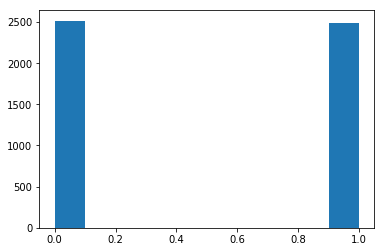

In [44]:
θ = 0.5
d = pm.Bernoulli.dist(p=θ)
samples = d.random(size=5000)
plt.hist(samples);

In [48]:
#sample mean and variance
mean = np.sum(samples)/len(samples)
variance = np.sum((samples-mean)**2)/len(samples)
print(samples[0:10])
print(' ')
print('sample mean=',mean, 'theorethical=',θ) #the sampling mean converges to E[x_i]=N p_i
print('sample variance=',variance, 'theorethical=',θ*(1-θ))


[0 0 0 1 1 1 1 1 1 1]
 
sample mean= 0.4968 theorethical= 0.5
sample variance= 0.24998976000000003 theorethical= 0.25


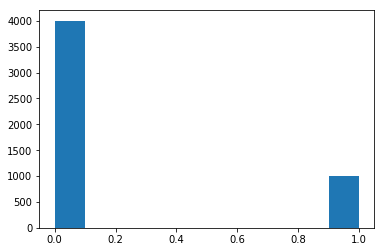

In [55]:
θ = 0.2
d = pm.Bernoulli.dist(p=θ)
samples = d.random(size=5000)
plt.hist(samples);

In [56]:
#sample mean and variance
mean = np.sum(samples)/len(samples)
variance = np.sum((samples-mean)**2)/len(samples)
print(samples[0:10])
print(' ')
print('sample mean=',mean, 'theorethical=',θ) #the sampling mean converges to E[x_i]=N p_i
print('sample variance=',variance, 'theorethical=',θ*(1-θ))

[0 0 0 0 0 0 0 0 0 0]
 
sample mean= 0.1994 theorethical= 0.2
sample variance= 0.15963964 theorethical= 0.16000000000000003


## Binomial distribution
The binomial distribution gives the discrete probability distribution of obtaining exactly $x$ successes out of $n$ Bernoulli trials (where the result of each Bernoulli trial is true with probability $p$ and false with probability $1-p$). 

The binomial distribution is therefore given by

$$
q(x) = \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}
$$

The mean and variance of $x$ are 

$$
E[x]=n p,~~~~E[(x-E[x])^2]=n p(1-p)
$$

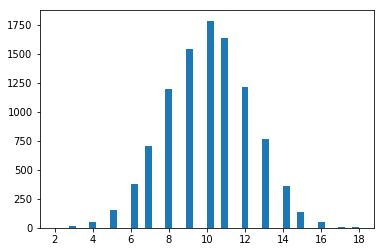

In [49]:
N=20
θ = 0.5
d = pm.Binomial.dist(n=N,p=θ)
samples=d.random(size=10000)
plt.hist(samples,bins='auto');

In [50]:
mean = np.sum(samples)/len(samples)
variance = np.sum((samples-mean)**2)/len(samples)
print(samples[0:10])
print(' ')
print('sample mean=',mean, 'theorethical=',θ*N) #the sampling mean converges to E[x_i]=N p_i
print('sample variance=',variance, 'theorethical=',θ*(1-θ)*N)

[12  9 13 10 12  8 10 12 11 12]
 
sample mean= 10.0089 theorethical= 10.0
sample variance= 4.9936207900000005 theorethical= 5.0


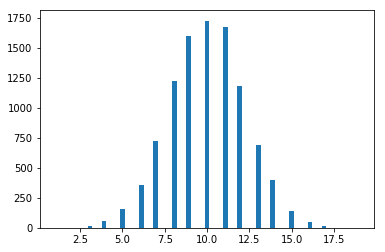

In [79]:
#Equivalent to
d = pm.Bernoulli.dist(p=0.5)
v=d.random(size=20*10000)
samples = v.reshape(10000,20).sum(axis=1)
plt.hist(samples,bins='auto');

In [53]:
mean = np.sum(samples)/len(samples)
variance = np.sum((samples-mean)**2)/len(samples)
print(mean,variance)

10.0089 4.9936207900000005


## Geometric distribution
The probability that the first success in a sequence of Bernoulli trials occurs on the $x$-th trial. 

The pmf of this distribution is


$$
q(x)=p(1−p)^{x−1}
$$

$$
E[x]=\frac{1}{p},~~~~E[(x-E[x])^2]=\frac{1-p}{p^2}
$$

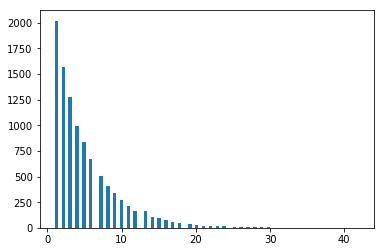

In [60]:
θ = 0.2
d = pm.Geometric.dist(p=θ)
samples=d.random(size=10000)
plt.hist(samples,bins='auto');

In [62]:
#sample mean and variance
mean = np.sum(samples)/len(samples)
variance = np.sum((samples-mean)**2)/len(samples)
print(samples[0:10])
print(' ')
print('sample mean=',mean, 'theorethical=',1/θ) #the sampling mean converges to E[x_i]=N p_i
print('sample variance=',variance, 'theorethical=',(1-θ)/θ**2)

[ 3  1  2  2  3 11  3  9  3  1]
 
sample mean= 5.0415 theorethical= 5.0
sample variance= 20.511577750000004 theorethical= 19.999999999999996


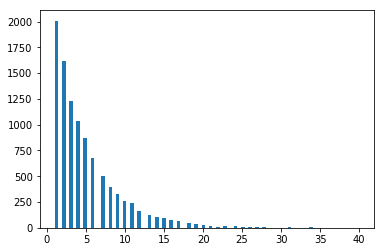

In [113]:
#Equivalent to
d = pm.Bernoulli.dist(p=0.2)
v=d.random(size=40*10000)
samples = np.argmax(v.reshape(10000,40),axis=1)+1#we need to add one because Python counts from zero
plt.hist(samples,bins='auto');

In [114]:
mean = np.sum(samples)/len(samples)
variance = np.sum((samples-mean)**2)/len(samples)
print(mean,variance)

4.9632 19.36504576


## Poisson Distribution
An event can occur 0, 1, 2,... times in an interval. The average number of events in an interval is designated $\mu$ is the event rate, also called the rate parameter. The probability of observing $k$ events in an interval is given by the equation

$$
{\displaystyle p(x{\text{ events in interval}})=e^{-\mu }{\frac {\mu^{x}}{x!}}}
$$

It is useful to model 
* The number of patients arriving in an emergency room between 10 and 11 pm
* The number of photons hitting a detector in a particular time interval

The mean and variance of $x$ are 

$$
E[x]=\mu,~~~~E[(x-E[x])^2]=\mu
$$

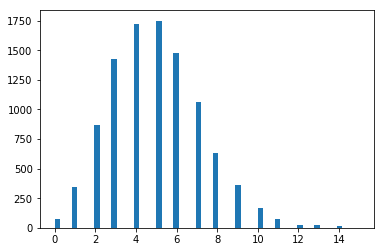

In [87]:
dist = pm.Poisson.dist(mu=5)
samples=dist.random(size=10000)
plt.hist(samples,bins='auto');


In [88]:
mean = np.sum(samples)/len(samples)
variance = np.sum((samples-mean)**2)/len(samples)
print(mean,variance)

4.9809 5.026735189999999


## Categorical distribution
It is the generalization of the Bernoulli distribution to more than two categories.
It can be used to model
* the outcome of a dice roll (6 categories)
* the outcome of an election (number of categories=number of candidates)


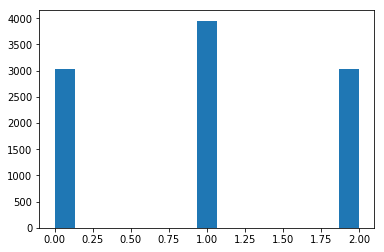

In [135]:
#example with three categories
dist = pm.Categorical.dist(p=[0.3,0.4,0.3])
samples = dist.random(size=10000)
plt.hist(samples,bins='auto');

## Multinomial distribution

It is the generalization of the Binomial distribution to more than two categories.
It can be used to model
* the outcome of N dice rolls (6 categories)
* the outcome of an election poll (number of categories=number of candidates)

Its PMF in the case of $k$ categories is:
$$
p(x_1,\dots, x_{k}; \theta_1,\ldots, \theta_k) = \displaystyle {n! \over x_{1}!\cdots x_{k}!}\theta_{1}^{x_{1}}\theta_{2}^{x_{2}}\cdots  \theta_{k}^{x_{k}}
$$
or, equivalently
$$
p(x_1,\dots, x_{k}; \theta_1,\ldots, \theta_k) = \frac{\Gamma(\sum_i x_i + 1)}{\prod_i \Gamma(x_i+1)} \prod_{i=1}^k \theta_i^{x_i}
$$

where $\theta_i\geq0$ and $\sum_{i=1}^k \theta_i=1$ are the probabilities of the $k$ categories and
$x_i$ is the number of time the i-th category has been observed in $N=\sum_{i=1}^k x_i$ trials.

The function $\Gamma(\cdot)$ is called gamma function:

https://en.wikipedia.org/wiki/Gamma_function
 
$ \Gamma(x_i+1)=x_i!$ when  $x_i$ is integer (like in our case). It generalises the factorial
to the case where $x_i$ is a real number

The expectation of the category x_i is
$$
E[x_i]=N \theta_i
$$
and the variance
$$
E[(x_i-E[x_i])^2]=N \theta_i (1-\theta_i)
$$
and covariance
$$
E[(x_i-E[x_i])(x_j-E[x_j])]=- N \theta_i \theta_j
$$
for $i\neqj$


In [41]:
#example with three categories
N=10
θ = np.array([0.3,0.4,0.3])
dist = pm.Multinomial.dist(p=θ,n=N) #n is the number of trials
samples = dist.random(size=250000)
print(samples[0:5,:])
print(' ')
print('sample mean=',np.mean(samples,axis=0), 'theorethical=',θ*N) #the sampling mean converges to E[x_i]=N p_i
print('sample variance=',np.var(samples,axis=0), 'theorethical=',θ*(1-θ)*N)
print('sample covariance between θ_1 and θ_2 =',np.mean((samples[:,0]-np.mean(samples[:,0],axis=0))*(samples[:,1]-np.mean(samples[:,1],axis=0)),axis=0), 'theorethical=',-θ[0]*θ[1]*N)

[[5. 2. 3.]
 [3. 3. 4.]
 [2. 4. 4.]
 [3. 4. 3.]
 [2. 1. 7.]]
 
sample mean= [3.00288  4.000216 2.996904] theorethical= [3. 4. 3.]
sample variance= [2.10043171 2.40004795 2.10207041] theorethical= [2.1 2.4 2.1]
sample covariance between θ_1 and θ_2 = -1.1992046220800001 theorethical= -1.2


The firs row tells us that in this 10 trials, we have obtained
the category 1 one time, the category 2 three times and the category 6 three times.

In [27]:
#Note that you can equivalently sample one sample from a multinomial with n=N
N=10
samples1 = pm.Multinomial.dist(p=[0.3,0.4,0.3],n=N).random(size=1)
# sampling N samples from the Categorical distribution
s = pm.Categorical.dist(p=[0.3,0.4,0.3]).random(size=N)
samples2 = [sum(s==0),sum(s==1),sum(s==2)]
samples2

[3, 2, 5]

## Why does the sample mean converge to the theoretical mean?

In probability theory, the law of large numbers (LLN) is a theorem that describes the result of performing the same experiment a large number of times. According to the law, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed. 

More details here:

https://en.wikipedia.org/wiki/Law_of_large_numbers